# Intro to Regression with Neural Networks in Tensorflow
* Making prediction from the relationship between the dependent and independent variables

In [1]:
#import tensorflow
import tensorflow as tf
print(tf.__version__)
from tensorflow import keras
from tensorflow.keras.layers import Activation,Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

2022-12-10 11:25:36.802951: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-10 11:25:36.802989: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-10 11:25:38.702793: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-12-10 11:25:38.702928: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2022-12-10 11:25:38.702939: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT War

2.11.0


In [2]:
import numpy as np
import matplotlib.pyplot as plt

        #creating some data
    
#creating Features
X = np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])

#create Labels
y = np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])


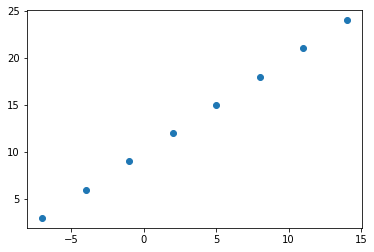

In [3]:
#visualize it
plt.scatter(X,y)

In [4]:
#relstioship
X+10
y==X+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

# Input and Output shapes

shapes varies depending n the problem
* problem like housing with features like nbed,utilities and garage as features will require a shape of 3
[bed,utility,garage]
Shape=[3]


In [5]:
#create  a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom","bathroom","garage"])
house_price = tf.constant([939700])
house_info,house_price

2022-12-08 16:18:55.300747: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-12-08 16:18:55.300793: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2022-12-08 16:18:55.300828: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (mylar-pc): /proc/driver/nvidia/version does not exist


(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [6]:
input_shape = X.shape
output_shape = y.shape
input_shape,output_shape

((8,), (8,))

In [7]:
#turn our numpy array into tensors
X = tf.cast(tf.constant(X),dtype=tf.float32)
y = tf.cast(tf.constant(y),dtype=tf.float32)

X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

# steps in Modeling in Tensorflow
* Create  a model - define  the input and output layers,as well as the hidden layers of a deep learning model

>sequential

>functional


* Compile a model- 

>define the loss function (in other words , the functio which tells our model how wrong it is) and 

>the optimizer (tells our model how to improve the patterns its learning) and

>evaluate metrics (what we  can use to interpret the performance of our model)

* Fitting a model- letting the model try  to find patterns between  X & y( features and labels)

              
#Fit The model
model.fit(x=X,
          y=y,
          epochs=30,
          shuffle=True,
          )

NameError: name 'model' is not defined

#check out X and y
X,y

 try predict
y_pred=model.predict([6.0,7.0,5.0,17.0])
y_pred

# Improving on model

 We can improve our model by altering the steps we took to create a model.
1. **create amodel** - here we might add more layers ,increase the numberof hidden units (all called neurons) within each of the hidden layers,change the activation fucntions of each layer.
2. **Compiling a model** here we might change the optimizeation functions or perhaps the learning rate of the optimization functions.
3. **Fitting a model** - here we might fit a model more epochs (leave it training for longer)or on more data(giving the model examples to learn from

* **Note !**

**Hyperperimeter** is like a dial in the neural network that can be adjusted to see how it improves, where as the perimeter is usually the patterns and neural

In [ ]:
# Hyperimeter

In [ ]:

#Trying   crete the model again

#create the model 
model = tf.keras.Sequential([
    Dense(units=100,input_shape=(1,),activation="relu"),
    Dense(units=50,activation="relu"),
    Dense(units=1)
    
])

# compile the model
model.compile(loss="mae",
              optimizer=tf.optimizers.Adam(learning_rate=0.01),#SGD() , ,
              metrics=['mae']

)


#Fit the model
model.fit(X,
         y,
         epochs=100)

In [ ]:
y_pred=model.predict([17.0,12.0,6.0,5.0,100.0,1.0])
y_pred

In [ ]:
model.summary()

## over fitting 
learning th patterns in the traing ning data too well
 we dont evalutae our model bases on the metrics on thre training data but te metrics on the data not seen before

##some changes we did to improve the model
* Adding a new  layer
*increase the number of hidden units
*change activation functions
*change the optimization
*change learning rate ###most important hyperperemeter change of many neuron network
*Fiting in more data sets

# EVALUATING  A MODEL

**IN PRACTICE , A TIPICAL WORK FLOW WILL BE**
```
Bulid A Model -> Fit it -> Evaluate it->tweak a model->fit it->evaluate it->tweak model -> fit it ->evalute it ... ```

# Note
* When Building a medl you have :experiment, experiment, experiment.
* When it comes to evaluating:visualize, visualize, visualize

 **Visualize:**
 
 * **The Data**- what data are we working with ? what does it look like?
 * **The model itself** What does our model look like?
 * **The training of a model** - how long does a model perform while it  learns
 * **The prediction of the model**- how do hte prediction of a model line up against the ground truth (acual)
 

# Next Dataset

In [3]:
X=tf.range(-100,100,5)
X

2022-12-10 11:26:08.437747: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-12-10 11:26:08.438232: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2022-12-10 11:26:08.438296: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (mylar-pc): /proc/driver/nvidia/version does not exist


<tf.Tensor: shape=(40,), dtype=int32, numpy=
array([-100,  -95,  -90,  -85,  -80,  -75,  -70,  -65,  -60,  -55,  -50,
        -45,  -40,  -35,  -30,  -25,  -20,  -15,  -10,   -5,    0,    5,
         10,   15,   20,   25,   30,   35,   40,   45,   50,   55,   60,
         65,   70,   75,   80,   85,   90,   95], dtype=int32)>

In [4]:
y=X+10
y

<tf.Tensor: shape=(40,), dtype=int32, numpy=
array([-90, -85, -80, -75, -70, -65, -60, -55, -50, -45, -40, -35, -30,
       -25, -20, -15, -10,  -5,   0,   5,  10,  15,  20,  25,  30,  35,
        40,  45,  50,  55,  60,  65,  70,  75,  80,  85,  90,  95, 100,
       105], dtype=int32)>

 # The 3 set
 * **Training dataset-70-80%:** ThE model learns from this data 
 * **Validation set- 10-15%** Model gets tuned on this dataset.Testing  on  how the teak affected the model on this data set
 * **Testing dataset- 10-15%**-gets evaluated o this data to test what it has learned.
 
 
 **aim**
 we aim for generalisation ofthe model.
 Being able to perfom well on dT it hasnt seen before

In [5]:
len(X)

40

In [6]:
#Split the data into train and test
X_train = X[:30] #first 40 are traing samples 
y_train = y[:30]

X_test = X[30:] #last 10 are testing samples
y_test = y[30:]
len(X_test), len(y_test)

(10, 10)

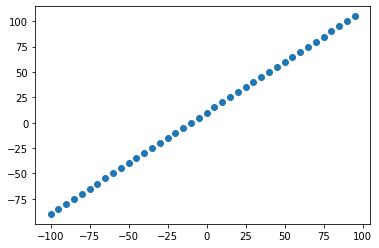

In [7]:
import matplotlib.pyplot as plt
plt.scatter(X,y)

## visualising  the data
Now we've got our data in training and testing sets... lets visualize it again


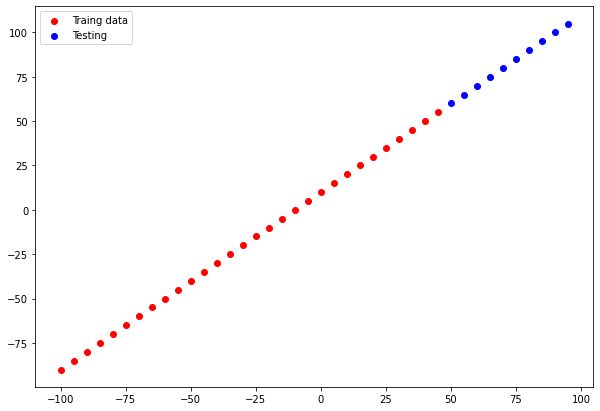

In [8]:
plt.figure(figsize=(10,7))

#plot training data in blue
plt.scatter(X_train,y_train, c="r",label="Traing data")

#plottest data in Green
plt.scatter(X_test,y_test, c='b',label="Testing")
#show a legend
plt.legend();

In [9]:
X_train[:100]

<tf.Tensor: shape=(30,), dtype=int32, numpy=
array([-100,  -95,  -90,  -85,  -80,  -75,  -70,  -65,  -60,  -55,  -50,
        -45,  -40,  -35,  -30,  -25,  -20,  -15,  -10,   -5,    0,    5,
         10,   15,   20,   25,   30,   35,   40,   45], dtype=int32)>

In [10]:
X_train.ndim,X_train.shape,tf.size(X_train)

(1, TensorShape([30]), <tf.Tensor: shape=(), dtype=int32, numpy=30>)

In [11]:
#bulding the neursl network for the data
# Build model
# tf.random.set_seed(42)
model=tf.keras.Sequential([
    Dense(units=10,input_shape=(1,)),
    Dense(units=1,name='output_layer')
    
],name="model_0")


#compile model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(), #Adam(lr=0.01),
              metrics=["mae"]
)




In [12]:
#fit model
model.fit(X_train,
          y_train,
          epochs=100,
          verbose=0
)


# Model summary

In [13]:
#visualize model
model.summary()

Model: "model_0"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


**Dense** means a **fully connected layer**

* Total params - total number of parameters in the model.
* Trainable parameters- these are the parameters (patterns) the model can update as it trains.
* Non-trainable params- these parameters arean't updated  during training (this is typical when you bring in already learn patterns or parameters from the other models during **transfer learning**  


**Reasource** For more indepth overview of parameter within a layer, check out MIT's introduction to deep learning vidoe.

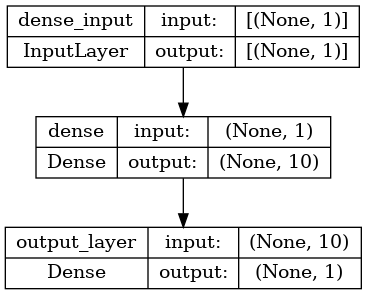

In [14]:
from tensorflow.keras.utils import plot_model

plot_model(model=model,show_shapes=True)

# Visualizeour model predictions

To visualize predictions , it's a god idea to plot them against the ground truth labels.

Often you'll see this in the form of y_test or y_true versus y_pred(ground truth versus your model

In [16]:
#Make Some Prediction
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 106ms/step


array([[ 59.17365 ],
       [ 64.988075],
       [ 70.802505],
       [ 76.616936],
       [ 82.43137 ],
       [ 88.2458  ],
       [ 94.06023 ],
       [ 99.87466 ],
       [105.68909 ],
       [111.503525]], dtype=float32)

In [18]:
#Let's create a plotting function
def plot_pred(train_data=X_train,
              train_labels=y_train,
              test_data=X_test,
              test_labels=y_test,
              predictions=y_pred):
    """
    Plot training data,test data and compares predictions to ground truth labels.
    """
    plt.figure(figsize=(10,7))
    #plot the traing data in blue
    plt.scatter(train_data,train_labels,c='b',label="Training data")
    #plot testing data in green
    plt.scatter(test_data,test_labels,c='g',label="Testing data")
    # Plot model's  predictions in red
    plt.scatter(test_data,predictions, c='r',label='Predictions')
    #show the legends
    plt.legend();

**Note:** if you  feel like you're going to use some kind of functionality in the future , its a good idea to turn it into a function 

# Plotting function 

In [17]:
#Let's create a plotting function
def plot_pred(train_data=X_train,
              train_labels=y_train,
              test_data=X_test,
              test_labels=y_test,
              predictions=y_pred):
    """
    Plot training data,test data and compares predictions to ground truth labels.
    """
    plt.figure(figsize=(10,7))
    #plot the traing data in blue
    plt.scatter(train_data,train_labels,c='b',label="Training data")
    #plot testing data in green
    plt.scatter(test_data,test_labels,c='g',label="Testing data")
    # Plot model's  predictions in red
    plt.scatter(test_data,predictions, c='r',label='Predictions')
    #show the legends
    plt.legend();

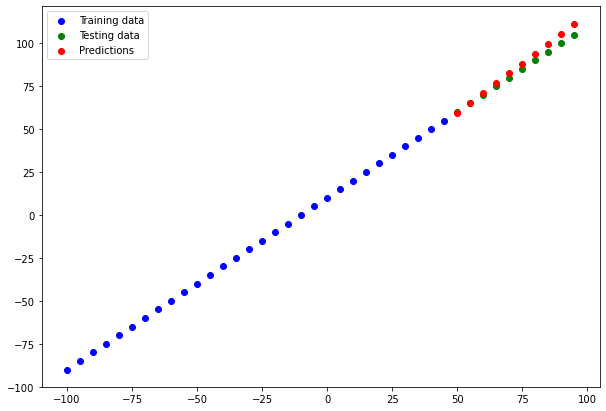

In [20]:
plot_pred()

## EVALUTIOIN OF MODEL

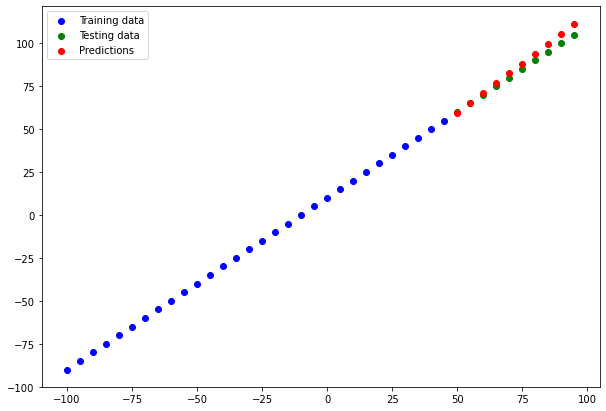

In [19]:
plot_pred()

## Evaluating our model's predictions with regression evelauation metrics

Depending on the problem you'r working on , there will be different evalution metrics to evaluate your model's performance.

Since we're working on a regression , two of the main metrics:
* **MAE** - MEAN ABSOLUTE ERROR, on  average , how wrong is each of my model's predictions.
>as a great starter metrics for any regression problems

* **MSE** - mean square error, square the average errors.
>use this when large errors are more significant than smaller errors
* **Huber** -tf.keras.losses.huber()
>combination of MSE and MAE .less sensitive to outliers than MSE


# First one:

In [21]:
  #Evaluate the model on the test data
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 131ms/step - loss: 3.0062 - mae: 3.0062


[3.006239652633667, 3.006239652633667]

# Second option:

**CALCULATE THE MAE:**
this result should be a scaler value since it adds all records and performs the mae like the result of **model.evaluate(X_test,y_test)**

In [22]:
#ans is tensor array
tf.keras.losses.MAE(y_test,y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([23.326351, 18.50954 , 15.178998, 13.176613, 12.5     , 13.149159,
       15.12409 , 18.424793, 23.189087, 29.003525], dtype=float32)>

In [23]:
#ans is also a tensor array
mae=tf.metrics.mean_absolute_error(y_test,y_pred)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([23.326351, 18.50954 , 15.178998, 13.176613, 12.5     , 13.149159,
       15.12409 , 18.424793, 23.189087, 29.003525], dtype=float32)>

In [24]:
y_pred

array([[ 59.17365 ],
       [ 64.988075],
       [ 70.802505],
       [ 76.616936],
       [ 82.43137 ],
       [ 88.2458  ],
       [ 94.06023 ],
       [ 99.87466 ],
       [105.68909 ],
       [111.503525]], dtype=float32)

In [25]:
#turn y_pred into a tensor
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 59.17365 ],
       [ 64.988075],
       [ 70.802505],
       [ 76.616936],
       [ 82.43137 ],
       [ 88.2458  ],
       [ 94.06023 ],
       [ 99.87466 ],
       [105.68909 ],
       [111.503525]], dtype=float32)>

In [26]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 60,  65,  70,  75,  80,  85,  90,  95, 100, 105], dtype=int32)>

we have to **reshape our tensors** in order to do perform a **dot product**

Our **y_pred tensor** has an extra dimention compared to the **y_test**  so we **squeeze the y_pred tensor**


In [27]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 59.17365 ,  64.988075,  70.802505,  76.616936,  82.43137 ,
        88.2458  ,  94.06023 ,  99.87466 , 105.68909 , 111.503525],
      dtype=float32)>

In [28]:
#calculating the MAE again 
mae=tf.metrics.mean_absolute_error(y_test,tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=3.0062382>

**Calculating the MSE**

In [29]:
#Calculate the mean square error
mse=tf.keras.losses.MSE(y_test,
                    tf.squeeze(y_pred)
)
mse

<tf.Tensor: shape=(), dtype=float32, numpy=13.529753>

In [30]:
#make functions of MAE and MSE
def mae(y_true,y_pred):
    return tf.metrics.mean_absolute_error(y_true=y_true,
                                         y_pred=tf.squeeze(y_pred))



def mse(y_true,y_pred):
    return tf.metrics.mean_squared_error(y_true=y_true,
                                        y_pred=tf.squeeze(y_pred))


### Running  experiments to improve our model 
```Bulid A Model -> Fit it -> Evaluate it->tweak a model->fit it->evaluate it->tweak model -> fit it ->evalute it ...```


1. `model_1` - same as original model ,1 layer ,trianed for 150 epochs
2. `model_2` -2 layers, trained for 100 epochs
3. `model_3` -2 layers ,trained for 500 epochs


**Bulid Model_1**

In [31]:
#set random seed
tf.random.set_seed(42)

#create the model
model_1=tf.keras.Sequential([
    Dense(units=10,input_shape=(1,)),
    Dense(units=1)
])

#compile model
model_1.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=['mae']
    
)

#fit model
model_1.fit(X_train,
          y_train,
          epochs=150,
          
)

Epoch 1/150
1/1 [==============================] - 0s 324ms/step - loss: 62.4484 - mae: 62.4484
Epoch 2/150
1/1 [==============================] - 0s 9ms/step - loss: 8.0290 - mae: 8.0290
Epoch 3/150
1/1 [==============================] - 0s 9ms/step - loss: 30.6077 - mae: 30.6077
Epoch 4/150
1/1 [==============================] - 0s 6ms/step - loss: 30.4941 - mae: 30.4941
Epoch 5/150
1/1 [==============================] - 0s 9ms/step - loss: 14.0219 - mae: 14.0219
Epoch 6/150
1/1 [==============================] - 0s 9ms/step - loss: 21.2969 - mae: 21.2969
Epoch 7/150
1/1 [==============================] - 0s 8ms/step - loss: 17.1864 - mae: 17.1864
Epoch 8/150
1/1 [==============================] - 0s 9ms/step - loss: 20.9541 - mae: 20.9541
Epoch 9/150
1/1 [==============================] - 0s 10ms/step - loss: 13.5421 - mae: 13.5421
Epoch 10/150
1/1 [==============================] - 0s 6ms/step - loss: 17.5037 - mae: 17.5037
Epoch 11/150
1/1 [==============================] - 0s 7ms

1/1 [==============================] - 0s 8ms/step - loss: 13.8178 - mae: 13.8178
Epoch 88/150
1/1 [==============================] - 0s 8ms/step - loss: 14.3072 - mae: 14.3072
Epoch 89/150
1/1 [==============================] - 0s 8ms/step - loss: 14.5489 - mae: 14.5489
Epoch 90/150
1/1 [==============================] - 0s 10ms/step - loss: 13.7397 - mae: 13.7397
Epoch 91/150
1/1 [==============================] - 0s 8ms/step - loss: 14.5099 - mae: 14.5099
Epoch 92/150
1/1 [==============================] - 0s 6ms/step - loss: 13.7488 - mae: 13.7488
Epoch 93/150
1/1 [==============================] - 0s 6ms/step - loss: 14.4756 - mae: 14.4756
Epoch 94/150
1/1 [==============================] - 0s 7ms/step - loss: 13.7549 - mae: 13.7549
Epoch 95/150
1/1 [==============================] - 0s 6ms/step - loss: 15.3136 - mae: 15.3136
Epoch 96/150
1/1 [==============================] - 0s 6ms/step - loss: 16.9839 - mae: 16.9839
Epoch 97/150
1/1 [==============================] - 0s 6ms/ste

1/1 [==============================] - 0s 58ms/step


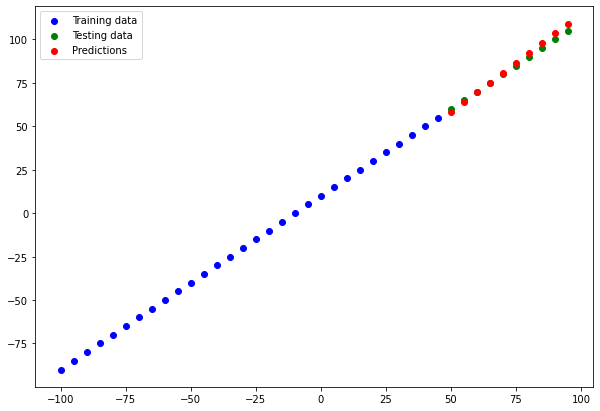

In [32]:
#Visualize predictions for model_1
y_pred_1 = model_1.predict(X_test)

plot_pred(predictions=y_pred_1)



In [33]:
#calculating model_1 evaluation metrics
mae_1 = mae(y_test,y_pred_1)
mse_1= mse(y_test,y_pred_1)

mae_1,mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=1.858807>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4.984519>)

**model_2**

In [34]:
#set random seed
tf.random.set_seed(42)

#build model
model_2=tf.keras.Sequential([
    Dense(units=10,input_shape=(1,)),
    Dense(units=5),
    Dense(units=1)
])
 #compile Model_2
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae']
)


#Fit model_2
model_2.fit(X_train,
            y_train,
            epochs=50
)

Epoch 1/50
1/1 [==============================] - 0s 369ms/step - loss: 25.0670 - mae: 25.0670
Epoch 2/50
1/1 [==============================] - 0s 7ms/step - loss: 101.2374 - mae: 101.2374
Epoch 3/50
1/1 [==============================] - 0s 10ms/step - loss: 40.9680 - mae: 40.9680
Epoch 4/50
1/1 [==============================] - 0s 8ms/step - loss: 33.9738 - mae: 33.9738
Epoch 5/50
1/1 [==============================] - 0s 6ms/step - loss: 24.8126 - mae: 24.8126
Epoch 6/50
1/1 [==============================] - 0s 7ms/step - loss: 6.9984 - mae: 6.9984
Epoch 7/50
1/1 [==============================] - 0s 5ms/step - loss: 8.0527 - mae: 8.0527
Epoch 8/50
1/1 [==============================] - 0s 5ms/step - loss: 28.8387 - mae: 28.8387
Epoch 9/50
1/1 [==============================] - 0s 7ms/step - loss: 32.0756 - mae: 32.0756
Epoch 10/50
1/1 [==============================] - 0s 6ms/step - loss: 23.4222 - mae: 23.4222
Epoch 11/50
1/1 [==============================] - 0s 6ms/step - los

1/1 [==============================] - 0s 63ms/step


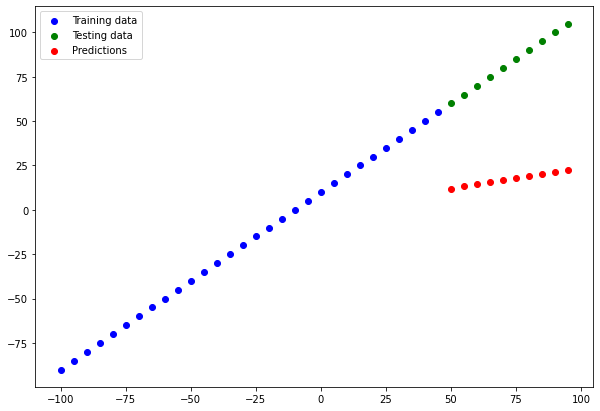

In [35]:
#visualize plot predictionns for model_2
y_pred_2=  model_2.predict(X_test)
plot_pred(predictions=y_pred_2)

In [36]:
#calculating model_2 evaluation metrics
mae_2 = mae(y_test,y_pred_2)
mse_2= mse(y_test,y_pred_2)

mae_2,mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=65.246056>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4378.0947>)

**model_3**


In [37]:
#bulding the neursl network for the data
# Build model
tf.random.set_seed(42)
model_3=tf.keras.Sequential([
    Dense(units=100,input_shape=(1,),activation="relu"),
    Dense(units=1)
    
])


#compile model
model_3.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.01), #Adam(lr=0.01),
              metrics=["mae"]
)

model_3.fit(X_train,
            y_train,
            epochs=1000
)

Epoch 1/1000
1/1 [==============================] - 0s 459ms/step - loss: 49.4868 - mae: 49.4868
Epoch 2/1000
1/1 [==============================] - 0s 8ms/step - loss: 49.0136 - mae: 49.0136
Epoch 3/1000
1/1 [==============================] - 0s 6ms/step - loss: 48.5414 - mae: 48.5414
Epoch 4/1000
1/1 [==============================] - 0s 5ms/step - loss: 48.0702 - mae: 48.0702
Epoch 5/1000
1/1 [==============================] - 0s 6ms/step - loss: 47.6000 - mae: 47.6000
Epoch 6/1000
1/1 [==============================] - 0s 6ms/step - loss: 47.1307 - mae: 47.1307
Epoch 7/1000
1/1 [==============================] - 0s 7ms/step - loss: 46.6622 - mae: 46.6622
Epoch 8/1000
1/1 [==============================] - 0s 7ms/step - loss: 46.2001 - mae: 46.2001
Epoch 9/1000
1/1 [==============================] - 0s 7ms/step - loss: 45.7392 - mae: 45.7392
Epoch 10/1000
1/1 [==============================] - 0s 12ms/step - loss: 45.2789 - mae: 45.2789
Epoch 11/1000
1/1 [===========================

1/1 [==============================] - 0s 7ms/step - loss: 8.9729 - mae: 8.9729
Epoch 87/1000
1/1 [==============================] - 0s 7ms/step - loss: 8.6955 - mae: 8.6955
Epoch 88/1000
1/1 [==============================] - 0s 12ms/step - loss: 8.4632 - mae: 8.4632
Epoch 89/1000
1/1 [==============================] - 0s 8ms/step - loss: 8.2841 - mae: 8.2841
Epoch 90/1000
1/1 [==============================] - 0s 6ms/step - loss: 8.1623 - mae: 8.1623
Epoch 91/1000
1/1 [==============================] - 0s 7ms/step - loss: 8.0963 - mae: 8.0963
Epoch 92/1000
1/1 [==============================] - 0s 7ms/step - loss: 8.0853 - mae: 8.0853
Epoch 93/1000
1/1 [==============================] - 0s 6ms/step - loss: 8.0962 - mae: 8.0962
Epoch 94/1000
1/1 [==============================] - 0s 8ms/step - loss: 8.0949 - mae: 8.0949
Epoch 95/1000
1/1 [==============================] - 0s 9ms/step - loss: 8.0553 - mae: 8.0553
Epoch 96/1000
1/1 [==============================] - 0s 7ms/step - loss: 

1/1 [==============================] - 0s 7ms/step - loss: 3.9660 - mae: 3.9660
Epoch 173/1000
1/1 [==============================] - 0s 7ms/step - loss: 3.9635 - mae: 3.9635
Epoch 174/1000
1/1 [==============================] - 0s 7ms/step - loss: 3.9610 - mae: 3.9610
Epoch 175/1000
1/1 [==============================] - 0s 6ms/step - loss: 3.9584 - mae: 3.9584
Epoch 176/1000
1/1 [==============================] - 0s 10ms/step - loss: 3.9556 - mae: 3.9556
Epoch 177/1000
1/1 [==============================] - 0s 8ms/step - loss: 3.9529 - mae: 3.9529
Epoch 178/1000
1/1 [==============================] - 0s 8ms/step - loss: 3.9500 - mae: 3.9500
Epoch 179/1000
1/1 [==============================] - 0s 6ms/step - loss: 3.9471 - mae: 3.9471
Epoch 180/1000
1/1 [==============================] - 0s 7ms/step - loss: 3.9441 - mae: 3.9441
Epoch 181/1000
1/1 [==============================] - 0s 8ms/step - loss: 3.9411 - mae: 3.9411
Epoch 182/1000
1/1 [==============================] - 0s 7ms/ste

1/1 [==============================] - 0s 7ms/step - loss: 3.7186 - mae: 3.7186
Epoch 259/1000
1/1 [==============================] - 0s 6ms/step - loss: 3.7157 - mae: 3.7157
Epoch 260/1000
1/1 [==============================] - 0s 6ms/step - loss: 3.7128 - mae: 3.7128
Epoch 261/1000
1/1 [==============================] - 0s 10ms/step - loss: 3.7099 - mae: 3.7099
Epoch 262/1000
1/1 [==============================] - 0s 6ms/step - loss: 3.7068 - mae: 3.7068
Epoch 263/1000
1/1 [==============================] - 0s 9ms/step - loss: 3.7037 - mae: 3.7037
Epoch 264/1000
1/1 [==============================] - 0s 9ms/step - loss: 3.7006 - mae: 3.7006
Epoch 265/1000
1/1 [==============================] - 0s 7ms/step - loss: 3.6984 - mae: 3.6984
Epoch 266/1000
1/1 [==============================] - 0s 8ms/step - loss: 3.6948 - mae: 3.6948
Epoch 267/1000
1/1 [==============================] - 0s 9ms/step - loss: 3.6919 - mae: 3.6919
Epoch 268/1000
1/1 [==============================] - 0s 7ms/ste

1/1 [==============================] - 0s 8ms/step - loss: 3.4509 - mae: 3.4509
Epoch 345/1000
1/1 [==============================] - 0s 5ms/step - loss: 3.4476 - mae: 3.4476
Epoch 346/1000
1/1 [==============================] - 0s 11ms/step - loss: 3.4443 - mae: 3.4443
Epoch 347/1000
1/1 [==============================] - 0s 7ms/step - loss: 3.4409 - mae: 3.4409
Epoch 348/1000
1/1 [==============================] - 0s 7ms/step - loss: 3.4374 - mae: 3.4374
Epoch 349/1000
1/1 [==============================] - 0s 8ms/step - loss: 3.4339 - mae: 3.4339
Epoch 350/1000
1/1 [==============================] - 0s 8ms/step - loss: 3.4303 - mae: 3.4303
Epoch 351/1000
1/1 [==============================] - 0s 7ms/step - loss: 3.4269 - mae: 3.4269
Epoch 352/1000
1/1 [==============================] - 0s 8ms/step - loss: 3.4234 - mae: 3.4234
Epoch 353/1000
1/1 [==============================] - 0s 9ms/step - loss: 3.4201 - mae: 3.4201
Epoch 354/1000
1/1 [==============================] - 0s 6ms/ste

1/1 [==============================] - 0s 7ms/step - loss: 3.1494 - mae: 3.1494
Epoch 431/1000
1/1 [==============================] - 0s 7ms/step - loss: 3.1454 - mae: 3.1454
Epoch 432/1000
1/1 [==============================] - 0s 7ms/step - loss: 3.1414 - mae: 3.1414
Epoch 433/1000
1/1 [==============================] - 0s 6ms/step - loss: 3.1373 - mae: 3.1373
Epoch 434/1000
1/1 [==============================] - 0s 7ms/step - loss: 3.1349 - mae: 3.1349
Epoch 435/1000
1/1 [==============================] - 0s 7ms/step - loss: 3.1301 - mae: 3.1301
Epoch 436/1000
1/1 [==============================] - 0s 13ms/step - loss: 3.1264 - mae: 3.1264
Epoch 437/1000
1/1 [==============================] - 0s 7ms/step - loss: 3.1230 - mae: 3.1230
Epoch 438/1000
1/1 [==============================] - 0s 9ms/step - loss: 3.1195 - mae: 3.1195
Epoch 439/1000
1/1 [==============================] - 0s 9ms/step - loss: 3.1159 - mae: 3.1159
Epoch 440/1000
1/1 [==============================] - 0s 7ms/ste

1/1 [==============================] - 0s 5ms/step - loss: 2.7962 - mae: 2.7962
Epoch 517/1000
1/1 [==============================] - 0s 8ms/step - loss: 2.7915 - mae: 2.7915
Epoch 518/1000
1/1 [==============================] - 0s 7ms/step - loss: 2.7875 - mae: 2.7875
Epoch 519/1000
1/1 [==============================] - 0s 8ms/step - loss: 2.7822 - mae: 2.7822
Epoch 520/1000
1/1 [==============================] - 0s 6ms/step - loss: 2.7780 - mae: 2.7780
Epoch 521/1000
1/1 [==============================] - 0s 8ms/step - loss: 2.7734 - mae: 2.7734
Epoch 522/1000
1/1 [==============================] - 0s 7ms/step - loss: 2.7689 - mae: 2.7689
Epoch 523/1000
1/1 [==============================] - 0s 5ms/step - loss: 2.7644 - mae: 2.7644
Epoch 524/1000
1/1 [==============================] - 0s 7ms/step - loss: 2.7600 - mae: 2.7600
Epoch 525/1000
1/1 [==============================] - 0s 6ms/step - loss: 2.7555 - mae: 2.7555
Epoch 526/1000
1/1 [==============================] - 0s 7ms/step

1/1 [==============================] - 0s 8ms/step - loss: 2.3474 - mae: 2.3474
Epoch 603/1000
1/1 [==============================] - 0s 8ms/step - loss: 2.3397 - mae: 2.3397
Epoch 604/1000
1/1 [==============================] - 0s 6ms/step - loss: 2.3307 - mae: 2.3307
Epoch 605/1000
1/1 [==============================] - 0s 6ms/step - loss: 2.3199 - mae: 2.3199
Epoch 606/1000
1/1 [==============================] - 0s 6ms/step - loss: 2.3112 - mae: 2.3112
Epoch 607/1000
1/1 [==============================] - 0s 5ms/step - loss: 2.3036 - mae: 2.3036
Epoch 608/1000
1/1 [==============================] - 0s 5ms/step - loss: 2.2963 - mae: 2.2963
Epoch 609/1000
1/1 [==============================] - 0s 5ms/step - loss: 2.2885 - mae: 2.2885
Epoch 610/1000
1/1 [==============================] - 0s 5ms/step - loss: 2.2826 - mae: 2.2826
Epoch 611/1000
1/1 [==============================] - 0s 11ms/step - loss: 2.2750 - mae: 2.2750
Epoch 612/1000
1/1 [==============================] - 0s 6ms/ste

1/1 [==============================] - 0s 7ms/step - loss: 1.6330 - mae: 1.6330
Epoch 689/1000
1/1 [==============================] - 0s 8ms/step - loss: 1.6231 - mae: 1.6231
Epoch 690/1000
1/1 [==============================] - 0s 6ms/step - loss: 1.6147 - mae: 1.6147
Epoch 691/1000
1/1 [==============================] - 0s 6ms/step - loss: 1.6078 - mae: 1.6078
Epoch 692/1000
1/1 [==============================] - 0s 6ms/step - loss: 1.5956 - mae: 1.5956
Epoch 693/1000
1/1 [==============================] - 0s 6ms/step - loss: 1.5870 - mae: 1.5870
Epoch 694/1000
1/1 [==============================] - 0s 6ms/step - loss: 1.5781 - mae: 1.5781
Epoch 695/1000
1/1 [==============================] - 0s 6ms/step - loss: 1.5691 - mae: 1.5691
Epoch 696/1000
1/1 [==============================] - 0s 6ms/step - loss: 1.5597 - mae: 1.5597
Epoch 697/1000
1/1 [==============================] - 0s 8ms/step - loss: 1.5502 - mae: 1.5502
Epoch 698/1000
1/1 [==============================] - 0s 6ms/step

1/1 [==============================] - 0s 9ms/step - loss: 0.6420 - mae: 0.6420
Epoch 775/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.5621 - mae: 0.5621
Epoch 776/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.5772 - mae: 0.5772
Epoch 777/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.5104 - mae: 0.5104
Epoch 778/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.4818 - mae: 0.4818
Epoch 779/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.4829 - mae: 0.4829
Epoch 780/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.4724 - mae: 0.4724
Epoch 781/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.4864 - mae: 0.4864
Epoch 782/1000
1/1 [==============================] - 0s 8ms/step - loss: 0.4340 - mae: 0.4340
Epoch 783/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.5117 - mae: 0.5117
Epoch 784/1000
1/1 [==============================] - 0s 5ms/step

1/1 [==============================] - 0s 6ms/step - loss: 0.2867 - mae: 0.2867
Epoch 861/1000
1/1 [==============================] - 0s 9ms/step - loss: 0.2682 - mae: 0.2682
Epoch 862/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.1139 - mae: 0.1139
Epoch 863/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.1853 - mae: 0.1853
Epoch 864/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.1275 - mae: 0.1275
Epoch 865/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.2077 - mae: 0.2077
Epoch 866/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.1816 - mae: 0.1816
Epoch 867/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.2104 - mae: 0.2104
Epoch 868/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.2021 - mae: 0.2021
Epoch 869/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.1252 - mae: 0.1252
Epoch 870/1000
1/1 [==============================] - 0s 5ms/step

1/1 [==============================] - 0s 6ms/step - loss: 0.1427 - mae: 0.1427
Epoch 947/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0966 - mae: 0.0966
Epoch 948/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.1541 - mae: 0.1541
Epoch 949/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.1558 - mae: 0.1558
Epoch 950/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.0614 - mae: 0.0614
Epoch 951/1000
1/1 [==============================] - 0s 6ms/step - loss: 0.0685 - mae: 0.0685
Epoch 952/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.1377 - mae: 0.1377
Epoch 953/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.1028 - mae: 0.1028
Epoch 954/1000
1/1 [==============================] - 0s 7ms/step - loss: 0.1477 - mae: 0.1477
Epoch 955/1000
1/1 [==============================] - 0s 5ms/step - loss: 0.1578 - mae: 0.1578
Epoch 956/1000
1/1 [==============================] - 0s 5ms/step

1/1 [==============================] - 0s 59ms/step


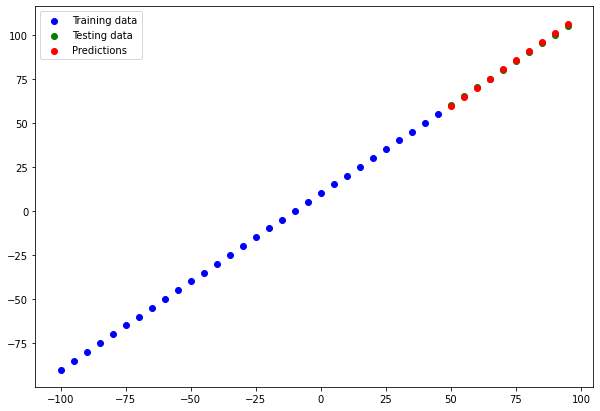

In [39]:
#visualize plot predictionns for model_3
y_pred_3=  model_3.predict(X_test)
plot_pred(predictions=y_pred_3)

In [40]:
#calculating model_2 evaluation metrics
mae_3 = mae(y_test,y_pred_3)
mse_3= mse(y_test,y_pred_3)

mae_3,mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=0.56612587>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.46151346>)

# Comparing The results of our experiments


In [41]:
# Let's compare our model's results using a pandas DataFrame
import pandas as pd
model_results =[['model_1',mae_1,mse_1],
               ['model_2',mae_2,mse_2],
               ['model_3',mae_3,mse_3]]

all_results = pd.DataFrame(model_results,columns =["Models","MSE ","MAE"])
all_results

,Models,MSE,MAE
0,model_1,"tf.Tensor(1.858807, shape=(), dtype=float32)","tf.Tensor(4.984519, shape=(), dtype=float32)"
1,model_2,"tf.Tensor(65.246056, shape=(), dtype=float32)","tf.Tensor(4378.0947, shape=(), dtype=float32)"
2,model_3,"tf.Tensor(0.56612587, shape=(), dtype=float32)","tf.Tensor(0.46151346, shape=(), dtype=float32)"


In [42]:
model_results =[['model_1',mae_1.numpy(),mse_1.numpy()],
               ['model_2',mae_2.numpy(),mse_2.numpy()],
               ['model_3',mae_3.numpy(),mse_3.numpy()]]

all_results = pd.DataFrame(model_results,columns =["Models","MSE ","MAE"])
all_results

,Models,MSE,MAE
0,model_1,1.858807,4.984519
1,model_2,65.246056,4378.094727
2,model_3,0.566126,0.461513


**Note:** one of the goals should be to minimize the time between  y our experiments.The more experiment s you do , the more things you'll  figure out which dont work and in turn , get closer to t figure out which don't work and  in  turn,get closer to figuring out what does work.Remember tha machine learning prationer

In [43]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 100)               200       
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#T